In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

from tensorflow.keras.applications import InceptionV3

pre_model = InceptionV3(input_shape = (224, 224, 3), 
                                include_top = False, 
                                weights = 'imagenet')

# Make all the layers in the pre-model non-trainable
for layer in pre_model.layers:
    layer.trainable = False

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
pre_model.summary()

In [ ]:

last_layer = pre_model.get_layer('batch_normalization_87')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 5, 5, 192)


In [ ]:
loss = 'mean_squared_error'
metrics = ['mse','mae']
batch_size=64
epochs = 10

In [ ]:
from tensorflow.keras.optimizers import Adam

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.4
x = layers.Dropout(0.4)(x)                  
# Add a final linear layer for classification
x = layers.Dense  (1, activation='linear')(x) 
model = Model(pre_model.input, x)

model.compile(optimizer = tf.keras.optimizers.Adam(0.01), 
              loss = 'mean_squared_error',
              metrics = metrics) 

model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [ ]:
raw_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SDSS.csv")
train_df = raw_dataset.copy()
train_df

,img_path,z
0,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.037450
1,/content/drive/MyDrive/Colab Notebooks/galaxy_...,-99.990000
2,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.029610
3,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.002882
4,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.038340
...,...,...
4453,/content/drive/MyDrive/Colab Notebooks/galaxy_...,-100.000000
4454,/content/drive/MyDrive/Colab Notebooks/galaxy_...,-99.990000
4455,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.024300
4456,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.022220


In [ ]:
import numpy as np
cnt=0
for row in train_df['z']:
    try:
        if row==-99.990000 or row==-100.000000 :
          train_df.loc[cnt, 'z']=np.nan
    except ValueError:
        pass
    cnt+=1

In [ ]:
train_df.isna().sum()

img_path       0
z           1357
dtype: int64

In [ ]:
# median = train_df['z'].median()
# train_df['z'].fillna(median, inplace=True)
train_df = train_df.dropna()

In [ ]:
train_df.isna().sum()

img_path    0
z           0
dtype: int64

In [ ]:
dataset=train_df.copy()

In [ ]:
train_df = dataset.sample(frac=0.8, random_state=0)
test_df = dataset.drop(train_df.index)

In [ ]:
datagen = ImageDataGenerator( 
            rescale=1./255.,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            validation_split=0.35,
            fill_mode='nearest')

train_generator=datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=None,
            x_col="img_path",
            y_col="z",
            subset="training",
            batch_size=32,
            seed=42,
            shuffle=True,
            class_mode="other",
            target_size=(224,224))

valid_generator=datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=None,
            x_col="img_path",
            y_col="z",
            subset="validation",
            batch_size=32,
            seed=42,
            class_mode="other",
            target_size=(224,224))

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
            dataframe=test_df,
            directory=None,
            x_col="img_path",
            y_col=None,
            batch_size=batch_size,
            seed=42,
            class_mode=None,
            target_size=(224,224))           

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python

Found 1613 validated image filenames.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python

Found 868 validated image filenames.
Found 620 validated image filenames.


In [ ]:
from keras.callbacks import EarlyStopping
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=4, verbose=1, mode='auto')

# class myCallback(tf.keras.callbacks.Callback): 
#     def on_epoch_end(self, epoch, logs={}): 
#         if(logs.get('loss') < 0.001):   
#           print("\nReached %2.2f%% loss, so stopping training!!" %(0.001*100))   
#           self.model.stop_training = True

# callbacks = myCallback()

In [ ]:
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=10,
                    steps_per_epoch=10,
                    verbose=1,
                    callbacks=[earlystopper])

Epoch 1/10
10/10 [==============================] - 617s 62s/step - loss: 9741.5205 - mse: 9741.5205 - mae: 70.8683 - val_loss: 479.4333 - val_mse: 479.4333 - val_mae: 19.8987
Epoch 2/10
10/10 [==============================] - 205s 20s/step - loss: 181.1280 - mse: 181.1280 - mae: 11.0711 - val_loss: 14.1223 - val_mse: 14.1223 - val_mae: 3.0974
Epoch 3/10
10/10 [==============================] - 185s 19s/step - loss: 26.0519 - mse: 26.0519 - mae: 3.8618 - val_loss: 4.1044 - val_mse: 4.1044 - val_mae: 1.4498
Epoch 4/10
10/10 [==============================] - 166s 17s/step - loss: 7.8546 - mse: 7.8546 - mae: 1.7829 - val_loss: 1.7215 - val_mse: 1.7215 - val_mae: 0.9227
Epoch 5/10
10/10 [==============================] - 151s 15s/step - loss: 3.8509 - mse: 3.8509 - mae: 1.3788 - val_loss: 1.6137 - val_mse: 1.6137 - val_mae: 0.9539
Epoch 6/10
10/10 [==============================] - 132s 13s/step - loss: 4.0357 - mse: 4.0357 - mae: 1.4032 - val_loss: 0.8306 - val_mse: 0.8306 - val_mae: 0.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
0,9741.520508,9741.520508,70.868317,479.433319,479.433319,19.898653,0
1,181.128006,181.128006,11.071093,14.122332,14.122332,3.097403,1
2,26.051855,26.051855,3.861820,4.104421,4.104421,1.449782,2
3,7.854615,7.854615,1.782864,1.721528,1.721528,0.922699,3
4,3.850934,3.850934,1.378772,1.613673,1.613673,0.953938,4
5,4.035739,4.035739,1.403215,0.830581,0.830581,0.643272,5
6,1.506450,1.506450,0.854994,0.647650,0.647650,0.553279,6
7,1.318830,1.318830,0.838031,0.422552,0.422552,0.475190,7
8,1.273226,1.273226,0.763297,0.375722,0.375722,0.456173,8
9,1.030811,1.030811,0.706916,0.308837,0.308837,0.411619,9


In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [z]')
  plt.legend()
  plt.grid(True)

  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Err [z]')
  plt.plot(hist['epoch'], hist['mae'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Err [$z^2$]')
  plt.plot(hist['epoch'], hist['mse'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
  plt.legend()



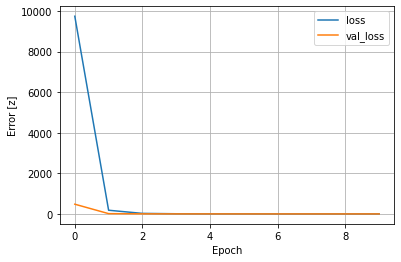

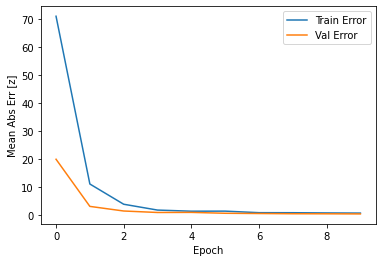

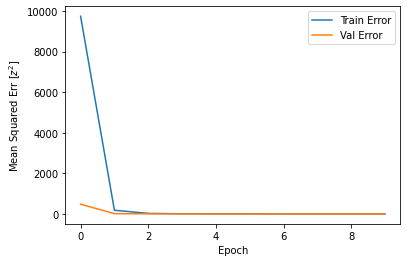

In [ ]:
plot_loss(history)

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Zmodel_inceptionV3")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Zmodel_inceptionV3/assets


In [ ]:
test_features = test_df.copy()
test_labels = test_features.pop('z')

In [ ]:
test_predictions = model.predict(test_generator)


In [ ]:
test_predictions

array([[ 1.11715943e-01],
       [ 1.07550442e+00],
       [ 2.63872921e-01],
       [-3.74435008e-01],
       [ 4.90240365e-01],
       [-2.66450018e-01],
       [-4.30733949e-01],
       [-4.38141078e-01],
       [-1.53502792e-01],
       [-3.35584253e-01],
       [ 6.75531149e-01],
       [ 5.60549311e-02],
       [-2.54092693e-01],
       [-2.27845266e-01],
       [-5.03149867e-01],
       [-4.43013996e-01],
       [ 7.07793951e-01],
       [ 1.23554718e+00],
       [-9.95530337e-02],
       [-3.80671591e-01],
       [-7.70310909e-02],
       [ 2.75154978e-01],
       [ 1.26360166e+00],
       [ 2.47553989e-01],
       [-3.48681301e-01],
       [-1.78321317e-01],
       [-1.70470059e+00],
       [-2.91757315e-01],
       [-6.42947614e-01],
       [ 5.05519450e-01],
       [-1.01962462e-01],
       [ 1.06142092e+00],
       [ 1.37933925e-01],
       [-3.73070508e-01],
       [ 8.06892067e-02],
       [-3.69444549e-01],
       [ 1.24225485e+00],
       [-8.14791739e-01],
       [-2.9

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/InceptionV3predictions', test_predictions)

In [ ]:
test_predictions = np.load('/content/drive/MyDrive/Colab Notebooks/InceptionV3predictions.npy')

In [ ]:
result={}

In [ ]:
result['Predicted'] = test_predictions

In [ ]:
result['z'] = np.array (test_labels)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true = result['z'], y_pred = result['Predicted'])
RMSE = MSE**(0.5)

In [ ]:
print(MSE)
print(RMSE)

0.4052279392208325
0.6365751638422854


In [ ]:
result['Predicted']=test_predictions.flatten()

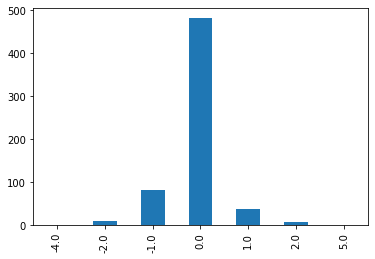

In [ ]:
fig1 = plt.gcf()
pd.value_counts(result['Predicted'].round(0)).sort_index().plot(kind="bar")

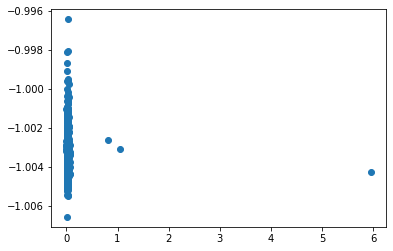

In [ ]:
plt.scatter(test_labels, test_predictions )
plt.plot(test_labels, test_predictions)

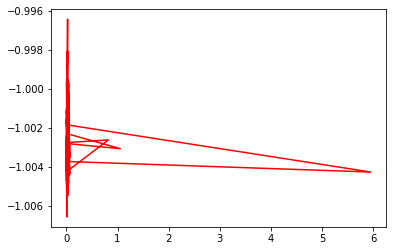

In [ ]:
plt.plot(test_labels, test_predictions, c = 'red')

In [ ]:
spec=test_labels.to_numpy()

In [ ]:
outlier=(spec-test_predictions)/(1+spec)

In [ ]:
outlier

array([1.00364528, 1.00178457, 1.00061312, 1.00351091, 1.00302736,
       1.00449832, 1.00235531, 1.00418301, 1.00328243, 1.00400028,
       1.00328818, 1.00092057, 1.00384232, 1.00360669, 1.00345067,
       1.00366903, 1.00403803, 1.00213265, 1.0036583 , 1.00306717,
       1.00326122, 1.00366749, 1.00405822, 1.00333536, 1.00379576,
       1.00184255, 1.0041355 , 1.0030776 , 1.00378675, 1.00418307,
       1.00290546, 1.00338207, 1.0048687 , 1.00359041, 1.00210792,
       1.0034552 , 1.00415784, 1.00362013, 1.00426176, 1.0038857 ,
       1.00408751, 1.00438102, 1.00393643, 1.0027305 , 1.00429856,
       1.00423927, 1.00448933, 1.00153064, 1.00338597, 1.0043081 ,
       1.00200183, 1.00225788, 1.00378153, 1.00382972, 1.00284782,
       1.00375305, 1.00246796, 1.00332292, 1.00317042, 1.00296732,
       1.00380765, 1.00318971, 1.00375041, 1.00215652, 1.00341778,
       1.00354563, 1.00400146, 1.00330774, 1.00359213, 1.00310475,
       1.00198774, 1.00197191, 1.00255502, 1.00302538, 1.00357

In [ ]:
f=pd.DataFrame(outlier)

In [ ]:
f[0].median()

1.0034375722393905

In [ ]:
f[0].mean()

1.0032038499071143